# Split data 7-3

In [1]:
import pandas as pd

# Load data from CSV file
data = pd.read_csv('H:\\My Drive\\PTDLKD\\Data\\elc_data_sheet.csv')
data 

,time,open,high,low,close,volume,ticker
0,2019-03-01,4090,4260,4090,4160,4840,ELC
1,2019-03-04,4160,4260,4070,4090,15570,ELC
2,2019-03-05,4160,4160,4090,4090,36620,ELC
3,2019-03-06,4090,4120,4090,4090,5240,ELC
4,2019-03-07,4110,4190,4090,4090,50950,ELC
...,...,...,...,...,...,...,...
1248,2024-02-26,20900,21600,20500,21600,526500,ELC
1249,2024-02-27,21900,22600,21700,22350,2129400,ELC
1250,2024-02-28,22550,22550,21850,22200,624400,ELC
1251,2024-02-29,22200,22400,21600,21700,833400,ELC


In [2]:
# 1. Các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression


In [3]:
# 2. Đọc file dữ liệu chứng khoán FPT và chia train test validate theo tỉ lệ 7:3
df = data
df['time'] = pd.to_datetime(df['time'])
df = df[['close', 'time']]
df = df.dropna() # Drop missing values
df.set_index('time', inplace=True)
#df = df.reset_index(drop=True) # Reset the index

# Split the data into training and testing sets
train_size = int(0.7 * len(df))
test_size = len(df) - train_size

train_data = df[:train_size]
test_data = df[train_size:]

In [4]:
pip install pmdarima

Note: you may need to restart the kernel to use updated packages.


In [5]:
df

,close
time,
2019-03-01,4160
2019-03-04,4090
2019-03-05,4090
2019-03-06,4090
2019-03-07,4090
...,...
2024-02-26,21600
2024-02-27,22350
2024-02-28,22200


In [6]:
# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['close'])

# Find the best ARIMA model using auto_arima
from pmdarima.arima import auto_arima
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True)

# Fit the model
model.fit(y_train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=12200.752, Time=0.17 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=12280.958, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=12220.247, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=12203.805, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=12279.389, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=12204.257, Time=0.26 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=12201.600, Time=0.11 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=12204.522, Time=0.81 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=12184.549, Time=0.39 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=12204.877, Time=0.18 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=12186.377, Time=0.99 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=12186.246, Time=0.92 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=12202.319, Time=0.65 sec
 ARIMA(3,1,4)(0,0,0)[0] intercept   : AIC=12187.918, Time=0.89 sec
 ARIMA(2,1,3)(0,0,0

ARIMA(order=(2, 1, 3), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [7]:
# 4. Quá trình testing 
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['close'])
y_pred = model.predict(n_periods=len(y_test))

In [8]:
import datetime

In [9]:
# 6. Quá trình tạo index predict 30 ngày tiếp theo
last_index = df.index[-1]  
next_30_days = [last_index + datetime.timedelta(days=i+1) for i in range(30)]
x_next_30_days =  np.array(next_30_days).reshape(-1, 1)
last_data = pd.Index(next_30_days)

# Predict the closing prices for the next 30 days

y_next_30_days = model.predict(n_periods=len(x_next_30_days))

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[9201.66872598 9236.54857083 9270.2234243  9248.15624931 9209.31322029
 9217.63860276 9256.93894009 9261.71763813 9226.19694589 9210.27696043
 9238.65370642 9262.78318431 9243.78048502 9214.92251921 9223.56699061
 9253.55495182 9255.04035942 9227.24204256 9216.90879291 9239.79934598
 9256.89817017 9240.80918249 9219.51670353 9227.84491706 9250.59775845
 9250.05644549 9228.42885719 9221.9894919  9240.31292138 9252.27261277]


In [10]:
# 7. Đánh giá độ chính xác validate, test
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Testing RMSE:', test_rmse)


Testing RMSE: 5839.1961155657555


Testing RMSE: 5839.1961155657555


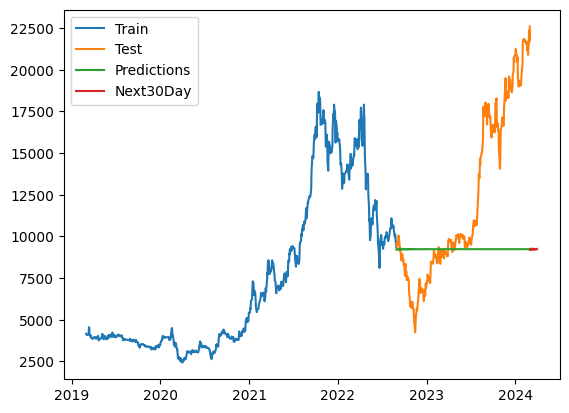

In [11]:
# 8. Tính RMSE
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Testing RMSE:', test_rmse)

# 9.Vẽ hình
plt.plot(train_data.index, train_data['close'])
plt.plot(test_data.index, test_data['close'])
plt.plot(test_data.index, y_pred)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Next30Day'])
plt.show()

In [12]:
test_data.index

DatetimeIndex(['2022-08-30', '2022-08-31', '2022-09-05', '2022-09-06',
               '2022-09-07', '2022-09-08', '2022-09-09', '2022-09-12',
               '2022-09-13', '2022-09-14',
               ...
               '2024-02-19', '2024-02-20', '2024-02-21', '2024-02-22',
               '2024-02-23', '2024-02-26', '2024-02-27', '2024-02-28',
               '2024-02-29', '2024-03-01'],
              dtype='datetime64[ns]', name='time', length=376, freq=None)

In [13]:
# Tính MAPE
def calculate_mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Tính MDA
def calculate_mda(y_true, y_pred):
    y_true_diff = np.diff(y_true)
    y_pred_diff = np.diff(y_pred)
    correct_direction = np.sign(y_true_diff) == np.sign(y_pred_diff)
    return np.mean(correct_direction) * 100

# Tính toán RMSE, MAPE và MDA
test_rmse = np.sqrt(np.mean((y_pred - y_test) ** 2))
test_mape = calculate_mape(y_test, y_pred)
test_mda = calculate_mda(y_test, y_pred)

# Tính MSLE
test_msle = np.mean((np.log1p(y_pred) - np.log1p(y_test)) ** 2)

# In kết quả
print('Testing RMSE:', test_rmse)
print('Testing MAPE:', test_mape)
print('Testing MDA:', test_mda)
print('Testing MSLE:', test_msle)

Testing RMSE: 5839.1961155657555
Testing MAPE: 29.784177228621033
Testing MDA: 40.8
Testing MSLE: 0.20808478005354322


# Split data 8:2

In [14]:
import pandas as pd

# Load data from CSV file
data = pd.read_csv('H:\\My Drive\\PTDLKD\\Data\\sgt_data_sheet.csv')
data

,time,open,high,low,close,volume,ticker
0,2019-03-01,3980,3980,3960,3960,20,SGT
1,2019-03-04,3680,3960,3680,3720,400,SGT
2,2019-03-05,3930,3930,3930,3930,10,SGT
3,2019-03-06,3930,3930,3930,3930,150,SGT
4,2019-03-07,3790,3860,3790,3860,110,SGT
...,...,...,...,...,...,...,...
1247,2024-02-26,11750,12000,11700,11900,18000,SGT
1248,2024-02-27,11900,12200,11900,12200,20200,SGT
1249,2024-02-28,12000,12100,12000,12050,5900,SGT
1250,2024-02-29,12000,12050,11950,11950,10800,SGT


In [15]:
# 1. Các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression


In [16]:
# 2. Đọc file dữ liệu chứng khoán FPT và chia train test validate theo tỉ lệ 7:1.5:1
df = data
df['time'] = pd.to_datetime(df['time'])
df = df[['close', 'time']]
df = df.dropna() # Drop missing values
df.set_index('time', inplace=True)
#df = df.reset_index(drop=True) # Reset the index

# Split the data into training, testing, and validation sets
# Split the data into training and testing sets
train_size = int(0.8 * len(df))
test_size = len(df) - train_size

train_data = df[:train_size]
test_data = df[train_size:]

In [17]:
!pip install pmdarima

'pip' is not recognized as an internal or external command,
operable program or batch file.


In [18]:
# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['close'])

# Find the best ARIMA model using auto_arima
from pmdarima.arima import auto_arima
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True)

# Fit the model
model.fit(y_train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=14910.398, Time=0.52 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=14944.682, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=14913.904, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=14914.568, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=14943.050, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=14913.951, Time=0.25 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=14912.664, Time=0.35 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=14915.985, Time=0.40 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=14912.036, Time=0.33 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=14915.681, Time=0.05 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=14910.937, Time=0.20 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=14910.901, Time=0.29 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=14913.434, Time=0.53 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=14908.814, Time=0.18 sec
 ARIMA(1,1,2)(0,0,0

ARIMA(order=(2, 1, 2), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [19]:
# 4. Quá trình testing 
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['close'])
y_pred = model.predict(n_periods=len(y_test))

In [20]:
import datetime

In [21]:
# 6. Quá trình tạo index predict 30 ngày tiếp theo
last_index = df.index[-1]  
next_30_days = [last_index + datetime.timedelta(days=i+1) for i in range(30)]
x_next_30_days =  np.array(next_30_days).reshape(-1, 1)
last_data = pd.Index(next_30_days)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(n_periods=len(x_next_30_days))

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[12143.43156332 12158.77657532 12153.5237994  12140.2903401
 12128.79855095 12123.13382094 12122.81347158 12125.29041076
 12128.08990401 12129.84145557 12130.31555041 12129.94942128
 12129.32329525 12128.83808429 12128.63242835 12128.65463333
 12128.78062175 12128.90386199 12128.97253733 12128.98442055
 12128.96291833 12128.93408734 12128.91405516 12128.90704773
 12128.90954536 12128.91569395 12128.92100493 12128.92360664
 12128.92373736 12128.92258224]


In [22]:
# 7. Đánh giá độ chính xác validate, test
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Testing RMSE:', test_rmse)


Testing RMSE: 1495.6757668369946


Testing RMSE: 1495.6757668369946


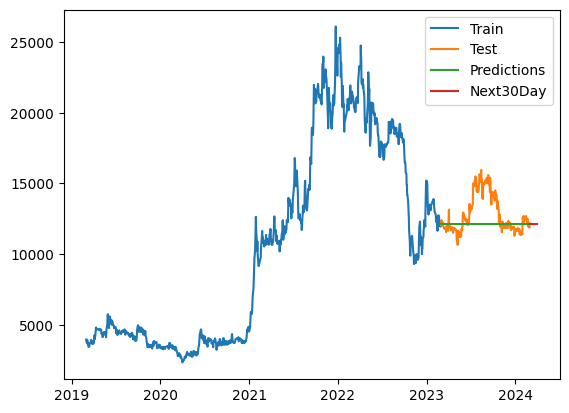

In [23]:
# 8. Tính RMSE
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Testing RMSE:', test_rmse)

# 9.Vẽ hình
plt.plot(train_data.index, train_data['close'])
plt.plot(test_data.index, test_data['close'])
plt.plot(test_data.index, y_pred)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Next30Day'])
plt.show()

In [24]:
test_data.index

DatetimeIndex(['2023-03-02', '2023-03-03', '2023-03-06', '2023-03-07',
               '2023-03-08', '2023-03-09', '2023-03-10', '2023-03-13',
               '2023-03-14', '2023-03-15',
               ...
               '2024-02-19', '2024-02-20', '2024-02-21', '2024-02-22',
               '2024-02-23', '2024-02-26', '2024-02-27', '2024-02-28',
               '2024-02-29', '2024-03-01'],
              dtype='datetime64[ns]', name='time', length=251, freq=None)

In [25]:
# Tính MAPE
def calculate_mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Tính MDA
def calculate_mda(y_true, y_pred):
    y_true_diff = np.diff(y_true)
    y_pred_diff = np.diff(y_pred)
    correct_direction = np.sign(y_true_diff) == np.sign(y_pred_diff)
    return np.mean(correct_direction) * 100

# Tính toán RMSE, MAPE và MDA
test_rmse = np.sqrt(np.mean((y_pred - y_test) ** 2))
test_mape = calculate_mape(y_test, y_pred)
test_mda = calculate_mda(y_test, y_pred)

# Tính MSLE
test_msle = np.mean((np.log1p(y_pred) - np.log1p(y_test)) ** 2)

# In kết quả
print('Testing RMSE:', test_rmse)
print('Testing MAPE:', test_mape)
print('Testing MDA:', test_mda)
print('Testing MSLE:', test_msle)

Testing RMSE: 1495.6757668369946
Testing MAPE: 7.471937473439544
Testing MDA: 22.0
Testing MSLE: 0.012526626024142238


# Split data 9 : 1

In [26]:
import pandas as pd

# Load data from CSV file
data = pd.read_csv('H:\\My Drive\\PTDLKD\\Data\\fpt_data_sheet.csv')
data

,time,open,high,low,close,volume,ticker
0,2019-03-01,19240,19270,19080,19270,590780,FPT
1,2019-03-04,19270,19520,19270,19440,806770,FPT
2,2019-03-05,19440,19520,19350,19390,824300,FPT
3,2019-03-06,19410,19480,19210,19270,695230,FPT
4,2019-03-07,19270,19440,19270,19330,374340,FPT
...,...,...,...,...,...,...,...
1248,2024-02-26,103900,108000,103500,108000,4466700,FPT
1249,2024-02-27,108500,109500,107400,107900,2800800,FPT
1250,2024-02-28,108000,108500,106300,108500,3461700,FPT
1251,2024-02-29,108200,109400,107700,109000,2824800,FPT


In [27]:
# 1. Các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression


In [28]:
# 2. Đọc file dữ liệu chứng khoán FPT và chia train test validate theo tỉ lệ 9:1
df = data
df['time'] = pd.to_datetime(df['time'])
df = df[['close', 'time']]
df = df.dropna() # Drop missing values
df.set_index('time', inplace=True)
#df = df.reset_index(drop=True) # Reset the index

# Split the data into training, testing, and validation sets
# Split the data into training and testing sets
train_size = int(0.9 * len(df))
test_size = len(df) - train_size

train_data = df[:train_size]
test_data = df[train_size:]

In [29]:
pip install pmdarima

In [30]:
# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['close'])

# Find the best ARIMA model using auto_arima
from pmdarima.arima import auto_arima
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True)

# Fit the model
model.fit(y_train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=18545.595, Time=0.31 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=18545.904, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=18547.162, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=18547.042, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=18549.865, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=18544.575, Time=0.15 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=18542.898, Time=0.06 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=18543.328, Time=0.10 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=18547.992, Time=0.11 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=18544.413, Time=0.27 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=18547.446, Time=0.04 sec

Best model:  ARIMA(0,1,2)(0,0,0)[0] intercept
Total fit time: 1.148 seconds


ARIMA(order=(0, 1, 2), scoring_args={}, suppress_warnings=True)

In [31]:
# 4. Quá trình testing 
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['close'])
y_pred = model.predict(n_periods=len(y_test))

In [32]:
import datetime

In [33]:
# 6. Quá trình tạo index predict 30 ngày tiếp theo
last_index = df.index[-1]  
next_30_days = [last_index + datetime.timedelta(days=i+1) for i in range(30)]
last_data = pd.Index(next_30_days)
x_next_30_days =  np.array(next_30_days).reshape(-1, 1)
# Predict the closing prices for the next 30 days

y_next_30_days = model.predict(n_periods=len(x_next_30_days))

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[94118.76293265 93933.94864823 94004.16710824 94074.38556825
 94144.60402826 94214.82248828 94285.04094829 94355.2594083
 94425.47786831 94495.69632832 94565.91478834 94636.13324835
 94706.35170836 94776.57016837 94846.78862838 94917.0070884
 94987.22554841 95057.44400842 95127.66246843 95197.88092845
 95268.09938846 95338.31784847 95408.53630848 95478.75476849
 95548.97322851 95619.19168852 95689.41014853 95759.62860854
 95829.84706855 95900.06552857]


In [34]:
# 7. Đánh giá độ chính xác validate, test
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Testing RMSE:', test_rmse)


Testing RMSE: 5004.966267933061


Testing RMSE: 5004.966267933061


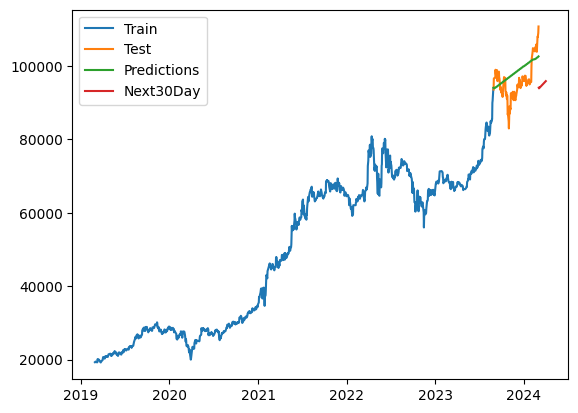

In [35]:
# 8. Tính RMSE
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Testing RMSE:', test_rmse)

# 9.Vẽ hình
plt.plot(train_data.index, train_data['close'])
plt.plot(test_data.index, test_data['close'])
plt.plot(test_data.index, y_pred)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Next30Day'])
plt.show()

In [36]:
test_data.index

DatetimeIndex(['2023-08-29', '2023-08-30', '2023-08-31', '2023-09-05',
               '2023-09-06', '2023-09-07', '2023-09-08', '2023-09-11',
               '2023-09-12', '2023-09-13',
               ...
               '2024-02-19', '2024-02-20', '2024-02-21', '2024-02-22',
               '2024-02-23', '2024-02-26', '2024-02-27', '2024-02-28',
               '2024-02-29', '2024-03-01'],
              dtype='datetime64[ns]', name='time', length=126, freq=None)

In [37]:
# Tính MAPE
def calculate_mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Tính MDA
def calculate_mda(y_true, y_pred):
    y_true_diff = np.diff(y_true)
    y_pred_diff = np.diff(y_pred)
    correct_direction = np.sign(y_true_diff) == np.sign(y_pred_diff)
    return np.mean(correct_direction) * 100

# Tính toán RMSE, MAPE và MDA
test_rmse = np.sqrt(np.mean((y_pred - y_test) ** 2))
test_mape = calculate_mape(y_test, y_pred)
test_mda = calculate_mda(y_test, y_pred)

# Tính MSLE
test_msle = np.mean((np.log1p(y_pred) - np.log1p(y_test)) ** 2)

# In kết quả
print('Testing RMSE:', test_rmse)
print('Testing MAPE:', test_mape)
print('Testing MDA:', test_mda)
print('Testing MSLE:', test_msle)

Testing RMSE: 5004.966267933061
Testing MAPE: 4.64546576234689
Testing MDA: 51.2
Testing MSLE: 0.0027621615201838226
